Found :: /hashtag/HAREFIELD?src=hashtag_click
Found :: /hashtag/BigBen?src=hashtag_click
Found :: /hashtag/London?src=hashtag_click
Found :: /hashtag/wildflowers?src=hashtag_click
Found :: /hashtag/spring?src=hashtag_click
Found :: /hashtag/naturephotography?src=hashtag_click
Found :: /hashtag/London?src=hashtag_click
Found :: /hashtag/wednesdayvibes?src=hashtag_click
Found :: /hashtag/greenwich?src=hashtag_click
Found :: /hashtag/visitgreenwich?src=hashtag_click
Found :: /hashtag/greenwichpark?src=hashtag_click
Found :: /hashtag/southlondon?src=hashtag_click
Found :: /hashtag/london?src=hashtag_click
Found :: /hashtag/visitlondon?src=hashtag_click
Found :: /hashtag/photography?src=hashtag_click
Found :: /hashtag/flowerphotography?src=hashtag_click
Found :: /hashtag/ilovephotography?src=hashtag_click
Found :: /hashtag/landscapephotography?src=hashtag_click
Found :: /hashtag/cityscapephotography?src=hashtag_click
Found :: /hashtag/naturephotography?src=hashtag_click
Chosen tag :: #visit

/Users/eivindnorling/.conda/envs/Oblig05/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eivindnorling/.conda/envs/Oblig05/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eivindnorling/.conda/envs/Oblig05/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eivindnorling/.conda/envs/Oblig05/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eivindnorling/.conda/envs/Oblig05/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=fl

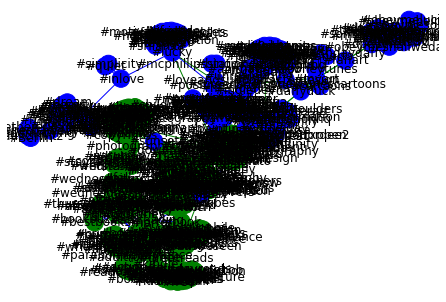

In [5]:
# Eivind Norling - INFO215 - Oblig05

import re
import time
import random
import networkx as nx
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options


def init():
    # Launch options and driver init
    chrome_options = Options()
    driver = webdriver.Chrome(executable_path='drivers/chromedriver', options=chrome_options)

    # init a new networkx graph
    G = nx.Graph()

    # list of starting tags to crawl
    hashtags = ['London', 'Berlin']

    # for each starting tag in list above, run crawl() function
    for tag in hashtags:
        crawl(G, tag, driver)

    # print all nodes after crawl()
    print(list(G.nodes))

    # get all tags with attribute 'tag'
    tags = nx.get_node_attributes(G, 'tag')

    # Debug
    print('Tags:', list(tags.values()))
    print(G.nodes.data())

    # color map to keep track of node / edge colors
    color_map = []

    # debug info
    for tag in tags.values():
        print('Value:', tag)

    # debug info
    for tag in tags.keys():
        print('Key:', tag)

    # debug info
    for tag in tags.items():
        print('Item:', tag)

    # node / edge colorizer
    for value in tags.values():
        # if value equals 'Berlin' append a blue node color
        if value == 'Berlin':
            color_map.append('blue')
        # else if value equals 'London' append a green node color
        elif value == 'London':
            color_map.append('green')
        # else if value is anything else append a gray node color
        else:
            color_map.append('gray')

    # Draw graph using our nodes, edges and colors with labels
    nx.draw(G, node_color=color_map, edge_color=color_map, with_labels=True)
    # Write to a gephi compatible graph file
    nx.write_gexf(G, "models/test.gexf")

    # Wait for input to exit
    input('Press ENTER to close the automated browser')
    driver.quit()


# Takes a graph, a tag to crawl and a webdriver
# crawls that tag for 20 hashtags
def crawl(graph, tag, driver):
    # Initializes URL and tells webdriver to open that URL
    current_url = 'https://twitter.com/search?q=%23' + tag

    # Keeps track of various things
    tag_count = 0
    used_tags = []
    first_run = True
    last_node = None

    # if first time visiting a new main hashtag [London / Berlin]
    if first_run:
        hashtag = str('#' + tag)
        used_tags.append(hashtag)
        last_node = hashtag
        graph.add_node(hashtag, tag=tag)

    # Create a attribute for our Graph
    graph.graph['tag'] = tag

    # visit 20 tags
    while tag_count < 20:
        driver.get(current_url)

        # wait for website to load
        time.sleep(5)

        # init BS parser with page HTML source
        bs = BeautifulSoup(driver.page_source, 'html.parser')

        # creates a list to store all a tags with href that starts with '/hashtag/'
        tag_list = []

        count = 0

        # appends all found hashtags objects to that list
        for found_tags in bs.find_all('a', href=re.compile('/hashtag/?')):
            # first run logic to fix twitter navbar being added to visited tags
            if not first_run:
                count += 1
                if count > 5:
                    print('Found ::', found_tags['href'])
                    tag_list.append(str(found_tags.text).lower())
            else:
                first_run = False
                print('Found ::', found_tags['href'])
                tag_list.append(str(found_tags.text).lower())

        # choose a random tag from list
        chosen_tag = str(random.choice(tag_list).lower())

        # if random tag has been visited, remove it from list and pick a new one
        if used_tags.__contains__(chosen_tag):
            tag_list.remove(chosen_tag)
            chosen_tag = str(random.choice(tag_list)).lower()

        # add selected tag to used tag list
        used_tags.append(str(chosen_tag).lower())
        print('Chosen tag ::', chosen_tag)

        # Create main node and edge
        graph.add_node(chosen_tag, tag=tag)
        graph.add_edge(last_node, chosen_tag, tag=tag)

        # keeps track of last visited node
        last_node = chosen_tag

        # for each found hashtag on current tweet
        for htag in tag_list:
            # create a node
            graph.add_node(htag, tag=tag)
            # and create a edge back to our main node
            graph.add_edge(chosen_tag, htag, tag=tag)

        # update current URL so we can use recursion to navigate on next loop iteration
        current_url = 'https://twitter.com/search?q=%23' + chosen_tag.strip('#')

        # increment counter and start loop again if visited less then 6 links
        tag_count += 1

    # debug & cleanup
    print(used_tags)
    used_tags.clear()
    first_run = True


# main function to start program
if __name__ == '__main__':
    init()
